<a href="https://colab.research.google.com/github/Himanshu0518/Machine-Learning/blob/main/17_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans Clusterring



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
features,true_labels = make_blobs(n_samples=500,random_state=26,centers=3)

In [ ]:
features.shape

(500, 2)

In [ ]:
print(features[0:5])

[[ 6.56515775 -7.16302813]
 [ 5.76477571  7.28631322]
 [ 5.12370381 -5.93159764]
 [-4.2549604   1.24891376]
 [-3.9856273  -0.42690256]]


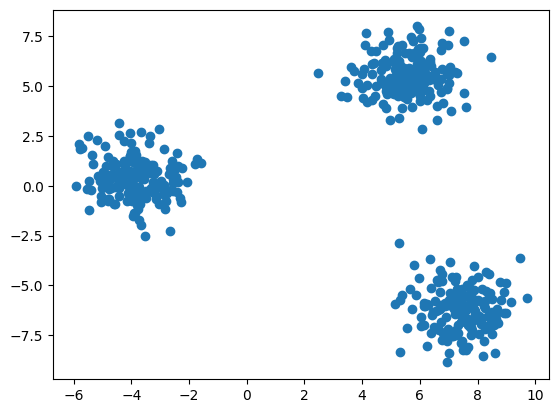

In [ ]:
plt.scatter(features[:,0],features[:,1])

This is what we will give as final ans . Let us plot using true labels

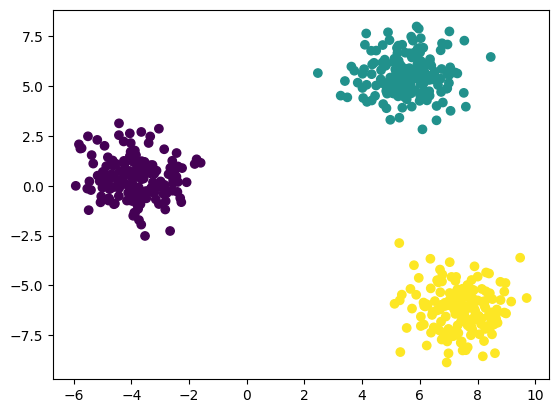

In [ ]:
plt.scatter(features[:,0],features[:,1],c=true_labels)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features =  scaler.transform(features)

In [ ]:
scaled_features[0:5]

array([[ 0.70629725, -1.44632581],
       [ 0.54651307,  1.49434744],
       [ 0.41853275, -1.19570991],
       [-1.45377583,  0.26563959],
       [-1.40000755, -0.07541597]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_features,true_labels,random_state=26)

**Manually calculating the correct value of k**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[749.212901705821, 327.5598776936789, 28.484473744401367, 24.492003757034375, 21.138305689788908, 18.014070904834696, 15.78941601086493, 14.022249052783776, 12.50411433391302]


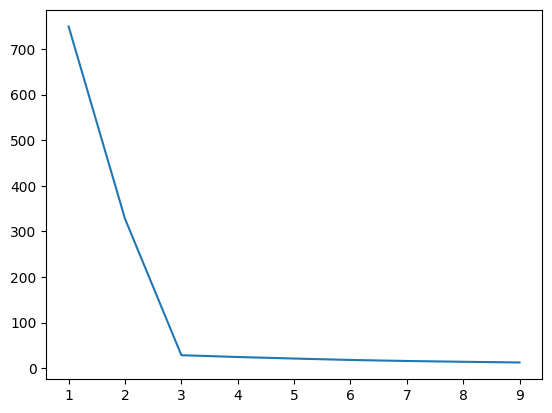

In [ ]:
plt.plot(range(1,10),wcss)

Now from this we can see we should take k=3

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=26)

In [ ]:
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=26)

In [ ]:
y_pred = kmeans.predict(X_test)

In [ ]:
print(true_labels[0:5],y_pred[0:5])

[2 1 2 0 0] [0 1 1 1 2]


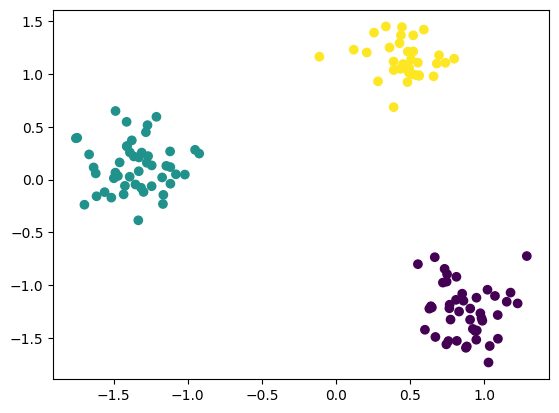

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

Calculating value of using library

**Finding K using inbuild function**

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,10),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [ ]:
#Performance matrix
from sklearn.metrics import silhouette_score

In [ ]:
score = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score.append(silhouette_score(X_train,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
score

[0.6133196568849499,
 0.8450226173463871,
 0.6582232564449784,
 0.4886691553663618,
 0.32965749956858403,
 0.3299731406550065,
 0.3405199402313001,
 0.3421932771754612]

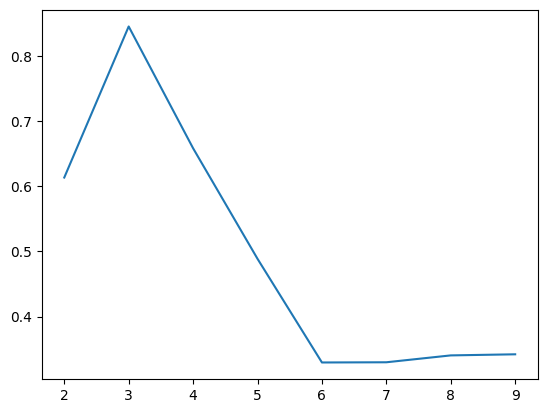

In [ ]:
plt.plot(range(2,10),score)

#Heirarichal Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['species'] = iris.target

In [ ]:
x = df.drop('species',axis=1)
y = df['species']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=26)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled =  scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=2)
X_tain_scaled = pca.fit_transform(X_train_scaled)

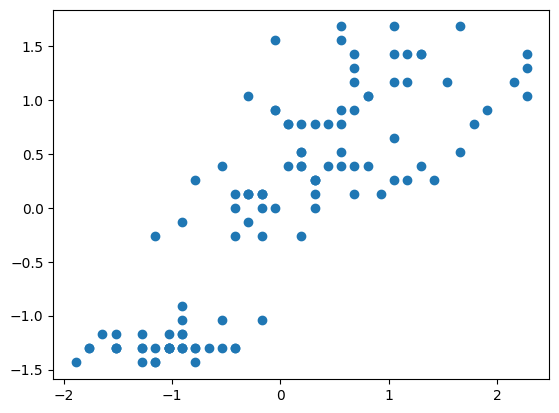

In [ ]:

plt.scatter(X_train_scaled[:,0],X_train_scaled[:,-1])

Text(0, 0.5, 'Disance')

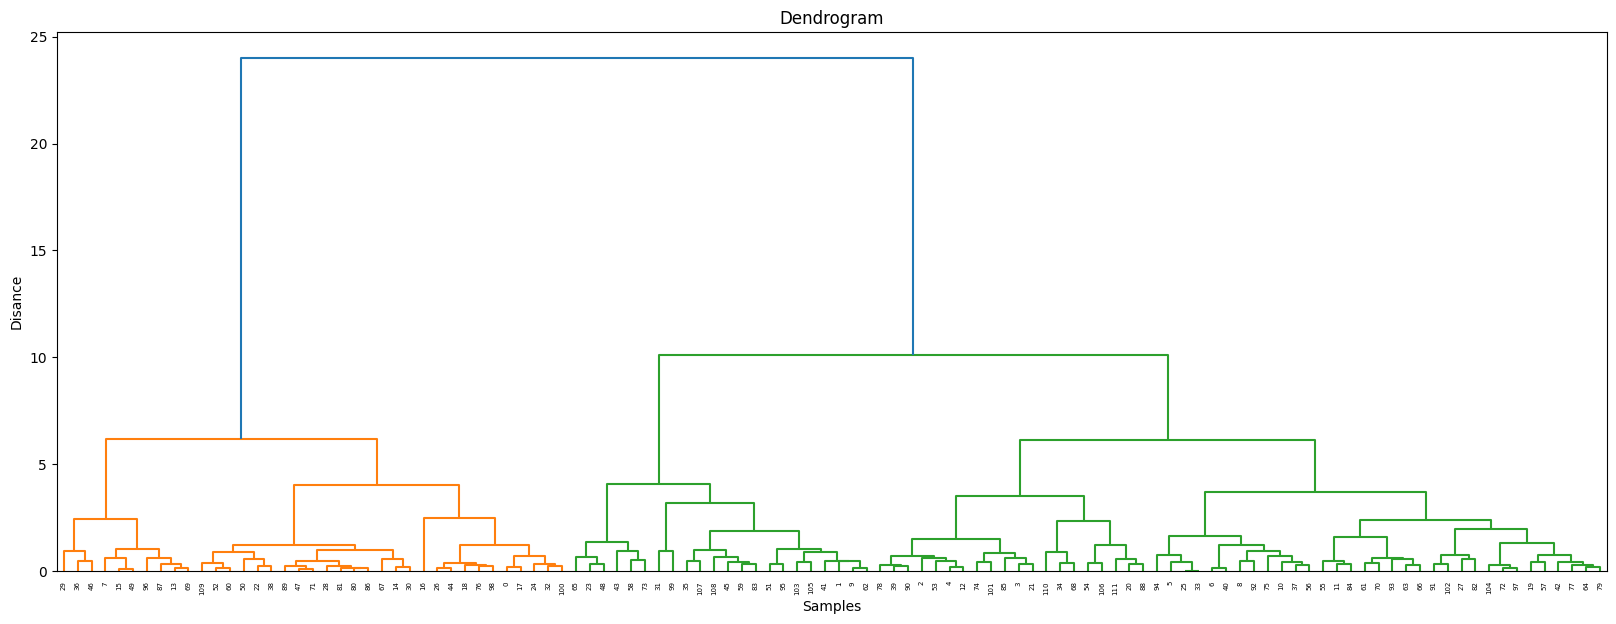

In [ ]:
# Agglomerative Clustering
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrogram")

sc.dendrogram(sc.linkage(X_train_scaled,method='ward'))
plt.xlabel('Samples')
plt.ylabel('Disance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [ ]:
cluster.labels_

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

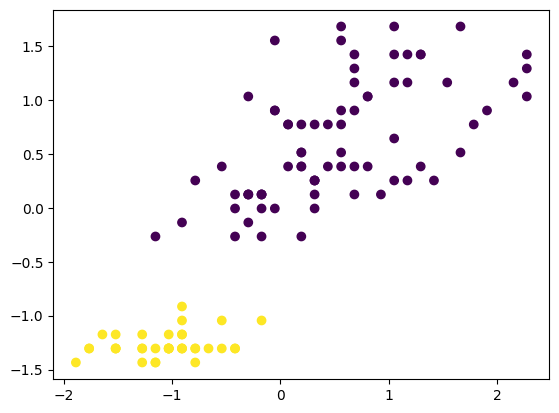

In [ ]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,-1],c=cluster.labels_)

In [ ]:
#Performance matrix
from sklearn.metrics import silhouette_score
score = []
for k in range(2,10):
  model = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
  model.fit(X_train_scaled)
  score.append(silhouette_score(X_train_scaled,model.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Text(0, 0.5, 'Silhouette_score')

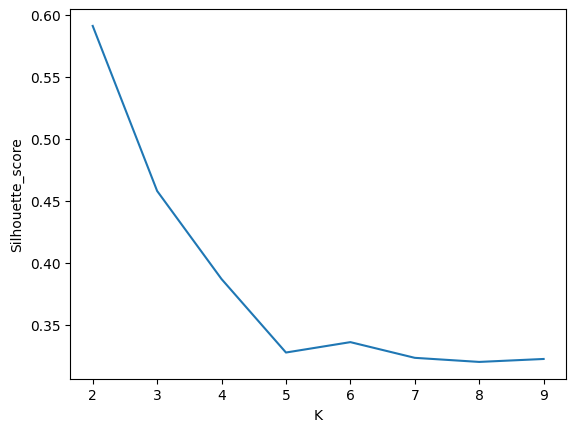

In [ ]:
plt.plot(range(2,10),score)
plt.xlabel('K')
plt.ylabel('Silhouette_score')


As I Know Silhouette score ranges from 0 to 1 and it is maximum for K=2 , as I have calculated earlier

#DBSCAN Clustering

This method is useful to  cluster non linear data

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [ ]:
x,y = make_moons(n_samples=200,noise=0.05,random_state=25)

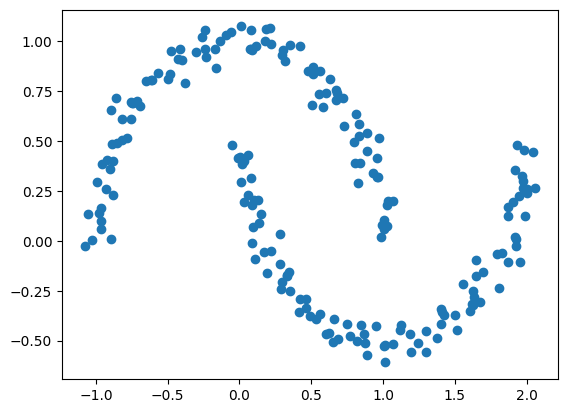

In [ ]:
plt.scatter(x[:,0],x[:,1])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Let us perform hyperparameter tunning

In [ ]:
dbscan = DBSCAN(eps=0.3,min_samples=4)

In [ ]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3, min_samples=4)

In [ ]:
y_pred = dbscan.labels_

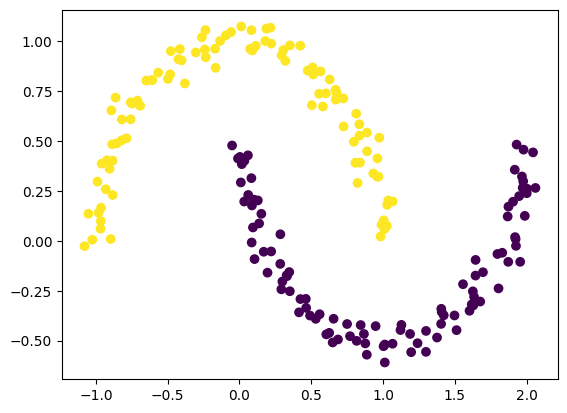

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y_pred)

In [ ]:
#Performance matrix
from sklearn.metrics import silhouette_score
score = []
for ep in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  model = DBSCAN(eps=ep)
  model.fit(X_scaled)
  labels = model.labels_
  if len(np.unique(labels)) > 1:
    score.append(silhouette_score(X_scaled,labels))
  else:
    score.append(None)

Text(0, 0.5, 'Silhouette_score')

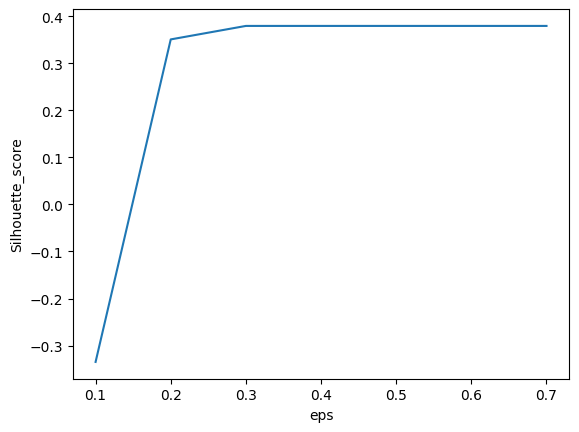

In [ ]:
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],score)
plt.xlabel('eps')
plt.ylabel('Silhouette_score')